In [1]:
# Neural Network with: 
    #Load/save Function for who, wih
    #backquery + vis
    #rotate train set 

In [1]:
#import numpy
import numpy
#import for sigmoid
import scipy.special
#import lib for plotting
import matplotlib.pyplot
#import ensure the plots are inside this notebokk, not an external window
%matplotlib inline
# scipy.ndimage for rotating image arrays
import scipy.ndimage
import time

In [2]:


# neural network class
class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input-, hidden-, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices w_input_hidden-> wih; w_hidden_output -> who
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes,self.hnodes))

        #activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        #backquery function of sigmoid
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
    
        #learning rate
        self.lr = learningrate
        pass
    
    
    # train the neural network
    def train (self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # wih*input= X_hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        #who*hidden = Final
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # sigmoid function on final_input
        final_outputs = self.activation_function(final_inputs)
        
        #error is the (target - actual) hidden -> output
        output_errors = targets - final_outputs
        
        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        #input -> hidden
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    

    # query the neural network
    def query (self, inputs_list):
        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # wih*input= X_hidden
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #who*hidden = Final
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # sigmoid function on final_input
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    #backquery the neural network
    #same terminology
    
    def backquery(self, targets_list):
        # transpose the targets list to vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        #calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)
        
        #calc signal out of hiddenlayer
        hidden_outputs = numpy.dot(self.who.T, final_outputs)
        #scale them back to 0.01 to 0.99
        #min->0.0
        hidden_outputs -= numpy.min(hidden_outputs)
        #max->1.0
        hidden_outputs /= numpy.max(hidden_outputs)
        #max->0.98
        hidden_outputs *= 0.98
        #max->0.99 , min->0.01
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs
        
        



In [3]:
#number of input, hidden, output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

#set learning rate
learning_rate= 0.01

#create instacnce of  neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


In [4]:
#load who;wih
#
#who
who_load = numpy.loadtxt('who_NN_1.out',delimiter=',')
n.who = who_load
print("who "+ str(numpy.shape(n.who)))
if ((numpy.shape(n.who)[0] == output_nodes) and (numpy.shape(n.who)[1] == hidden_nodes) ):
    print("pass")
else :
    print('fail')

#wih
wih_load = numpy.loadtxt('wih_NN_1.out',delimiter=',')
n.wih = wih_load
print("wih "+ str(numpy.shape(n.wih)))
if ((numpy.shape(n.wih)[0] == hidden_nodes) and (numpy.shape(n.wih)[1] == input_nodes) ):
    print("pass")
else :
    print('fail')

who (10, 200)
pass
wih (200, 784)
pass


In [6]:
#open  train file
training_data_file = open("mnist_dataset/emnist-digits-train.csv")
#training_data_file = open("mnist_dataset/emnist-digits-train.csv, "r")
training_data_list= training_data_file.readlines()
training_data_list= training_data_list[1:]
training_data_file.close()

In [7]:
# train neural network

# epoch is the number times the training data set is used for training
epochs = 1

print("Start: " + time.strftime("%d.%m.%Y %H:%M:%S"))
for e in range(epochs):
    #go through all records in training set
    for record in training_data_list:
        #data split by comma 
        all_values = record.split(',')
        #scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+ 0.01
        # create the target output values (all 0.01, except the desired label wich is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        #all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        #train
        n.train(inputs,targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
#        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), numpy.random.randint(1,10), cval=0.01, order=1, reshape=False)
#        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
#        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -1 * numpy.random.randint(1,10), cval=0.01, order=1, reshape=False)
#        n.train(inputs_minusx_img.reshape(784), targets)
                
        pass
    print(time.strftime("%d.%m.%Y %H:%M:%S"))
    pass



Start: 26.02.2020 10:41:45
26.02.2020 10:48:29


In [8]:
#open  test file
#test_data_file = open("mnist_dataset/emnist-digits-test.csv", "r")
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list= test_data_file.readlines()
test_data_file.close()

In [9]:
# test the neural network

#scorecard for how well the network performs
scorecard = []

#go through all the records in the test data set
for record in test_data_list:
    #split by ','
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+ 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to the list
    if (label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #answer doesn't match, add 0
        scorecard.append(0)
        pass
    pass

In [21]:
#calculate the performance score
scorecard_array = numpy.asarray(scorecard)
performance =  scorecard_array.sum() / scorecard_array.size
print("performance = ", performance)

performance =  0.2863


In [11]:
#save who;wih 


numpy.savetxt('who_NN_1.out', n.who, delimiter=',')
numpy.savetxt('wih_NN_1.out', n.wih, delimiter=',')

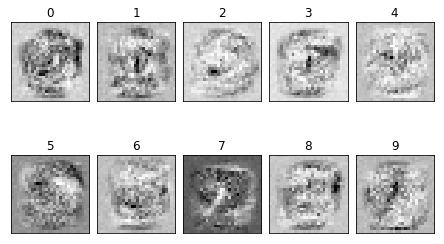

In [28]:
#run the network backwards for each label

def lable_draw(input_lable):
    # create the output signals for this label
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[input_lable] = 0.99
    
    # get image data
    image_data = n.backquery(targets)
    
    # reshape
    reshape = image_data.reshape(28,28)
    
    return reshape
   
    


for e in range(10):

    matplotlib.pyplot.subplot(2,5,e+1)
    matplotlib.pyplot.title(str(e))
    matplotlib.pyplot.xticks([])
    matplotlib.pyplot.yticks([])
    matplotlib.pyplot.imshow(lable_draw(e), cmap='Greys', interpolation='None')
    
   
    pass



matplotlib.pyplot.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
#save image file all-performance-date_time.png
matplotlib.pyplot.savefig(str('bq/all-')+str(int(round(performance*100,0)))+str(time.strftime("-%d_%m_%Y_%H_%M_%S"))+str('.png'), dpi = 900)       
    







[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]


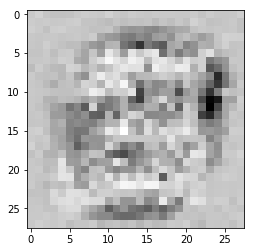

In [13]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 8
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')